In [1]:
import requests
import time
import json, os
import urllib.request
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
from IPython.display import set_matplotlib_formats
from bs4 import BeautifulSoup
from selenium import webdriver

%matplotlib inline
matplotlib.rc('font', family = 'Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes', unicode_minus = False)

In [2]:
driver = webdriver.Chrome()
driver.get("https://section.blog.naver.com/Search/Post.nhn?pageNo=1\
           &rangeType=ALL&orderBy=sim&keyword=제주도 여행")

In [3]:
driver.find_elements_by_css_selector("div.area_list_search > div:nth-child(1) > div > div.info_post > div > a")[0].click()

In [4]:
driver.switch_to.window(driver.window_handles[-1])

In [5]:
driver.switch_to.frame("mainFrame")

In [6]:
dom = BeautifulSoup(driver.page_source, "lxml")

In [7]:
word_list = dom.select(".se-main-container .se-text span")

In [8]:
word_list = "".join([_.text for _ in word_list if _.text != '\u200b'])

In [9]:
driver.close()
driver.switch_to.window(driver.window_handles[0])

In [10]:
twitter = Twitter()
morphs = []

for i in twitter.pos(word_list):
    morphs.append(i)

C:\Users\cdetg\AppData\Roaming\Python\Python38\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [20]:
f = open("D:/SBA/filtering.txt", 'r')
lines = f.readlines()
lines = [_.strip('\n') for _ in lines]
f.close()

In [22]:
# 명사, 형용사, 부사만 골라내기
noun_adj_adv_list = []

for word, tag in morphs:
    if (tag in ['Noun'] and len([_ for _ in lines if _ not in word]) == len(lines)):
        noun_adj_adv_list.append(word)

In [23]:
# 빈도수
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())

words

{'제주도': 8,
 '코스': 7,
 '사진': 7,
 '구경': 6,
 '다음': 4,
 '도착': 3,
 '방문': 3,
 '제주': 3,
 '모습': 3,
 '산책로': 3,
 '바람': 3,
 '소개': 3,
 '워낙': 3,
 '음료': 3,
 '여름': 2,
 '최대': 2,
 '관광지': 2,
 '한번': 2,
 '먼저': 2,
 '가장': 2,
 '용두암': 2,
 '쭉': 2,
 '요': 2,
 '무엇': 2,
 '경치': 2,
 '추억': 2,
 '담': 2,
 '음식': 2,
 '휴식': 2,
 '제대로': 2,
 '힐링': 2,
 '출발': 2,
 '생각': 2,
 '부지': 2,
 '좀': 2,
 '더': 2,
 '울창': 2,
 '공간': 2,
 '그': 2,
 '도두항': 2,
 '풍경': 2,
 '반짝': 2,
 '사람': 2,
 '층': 2,
 '규모': 2,
 '느낌': 2,
 '중': 2,
 '카페': 2,
 '참고': 2,
 '시작': 2,
 '또한': 2,
 '불꽃': 2,
 '배경': 2,
 '만끽': 2,
 '날': 2,
 '아침': 2,
 '향': 2,
 '마치': 2,
 '녹차': 2,
 '디저트': 2,
 '기도': 2,
 '슬슬': 1,
 '휴가': 1,
 '철도': 1,
 '올해': 1,
 '어디': 1,
 '고민': 1,
 '만큼': 1,
 '가도': 1,
 '무더위': 1,
 '일상': 1,
 '스트레스': 1,
 '준': 1,
 '정리': 1,
 '추천': 1,
 '제일': 1,
 '자마자': 1,
 '공항': 1,
 '해안': 1,
 '도로': 1,
 '남짓': 1,
 '달리': 1,
 '입장료': 1,
 '전혀': 1,
 '밖': 1,
 '장난': 1,
 '전망대': 1,
 '옆쪽': 1,
 '보이': 1,
 '아래': 1,
 '암': 1,
 '바다': 1,
 '정도': 1,
 '절물': 1,
 '자연휴양림': 1,
 '청정': 1,
 '자': 1,
 '연속': 1,
 '처': 1,
 '제공': 1,

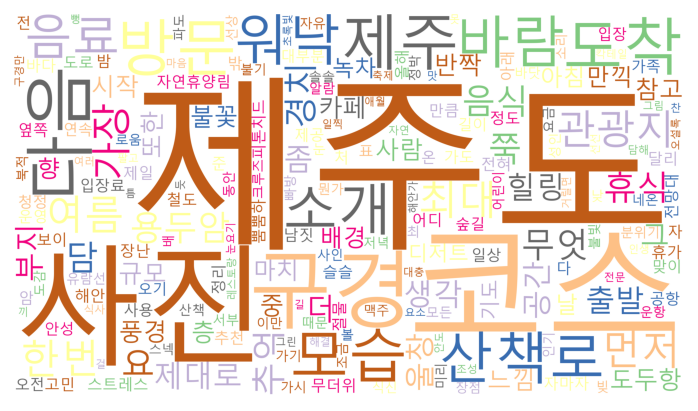

In [24]:
wordcloud = WordCloud(font_path = "C:Windows/Fonts/malgun.ttf", background_color='white', colormap = "Accent_r",
                     width = 3500, height = 2000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()